Healthcare Admissions , Cost Analytics & Prediction

In [71]:
#Importing Libraries

import pandas as pd
import numpy as np


In [72]:

#Loading Dataset

df= pd.read_csv("healthcare_dataset.csv")


In [73]:
print("Dataset Loaded Successfully")

#View initial rows and columns to understand the structure
print ("Shape:",df.shape)
df.head()


Dataset Loaded Successfully
Shape: (55500, 15)


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [74]:
#Checking missing values

df.isnull().sum()

print("Missing Values: \n",df.isnull().sum())

#percentage missing
missing_percentage = df.isnull().mean() * 100

print(missing_percentage)



Missing Values: 
 Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64
Name                  0.0
Age                   0.0
Gender                0.0
Blood Type            0.0
Medical Condition     0.0
Date of Admission     0.0
Doctor                0.0
Hospital              0.0
Insurance Provider    0.0
Billing Amount        0.0
Room Number           0.0
Admission Type        0.0
Discharge Date        0.0
Medication            0.0
Test Results          0.0
dtype: float64


In [75]:
#Handling Missing Values

categorical_colmns = df.select_dtypes(include="object").columns
numeric_cols = df.select_dtypes(include=np.number).columns

df[categorical_colmns] = df[categorical_colmns].fillna("Unknown")
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

print("Missing values after cleaning:\n", df.isnull().sum())


Missing values after cleaning:
 Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64


In [76]:
#Convert Date Columns

Date_Colms= ["Date of Admission", "Discharge Date"]

for col in Date_Colms:
    df[col] = pd.to_datetime(df[col], errors='coerce')

df[Date_Colms].head() 

,Date of Admission,Discharge Date
0,2024-01-31,2024-02-02
1,2019-08-20,2019-08-26
2,2022-09-22,2022-10-07
3,2020-11-18,2020-12-18
4,2022-09-19,2022-10-09


In [77]:
#Derive length of Stay (In days)

df["Len_of_Stay"] = (df["Discharge Date"] - df["Date of Admission"]).dt.days

#Check for negative or invalid stay durations
df[df["Len_of_Stay"] < 0].head()

# Replace negative with NaN (optional)
df.loc[df["Len_of_Stay"] < 0, "Len_of_Stay"] = np.nan

In [78]:
#Basic Statistics

Numerical_Summary = df.describe()
Categorical_Summary = df.describe(include=['object', 'category'])


Numerical_Summary,Categorical_Summary

print(Numerical_Summary)
print(Categorical_Summary)



                Age              Date of Admission  Billing Amount  \
count  55500.000000                          55500    55500.000000   
mean      51.539459  2021-11-01 01:02:22.443243008    25539.316097   
min       13.000000            2019-05-08 00:00:00    -2008.492140   
25%       35.000000            2020-07-28 00:00:00    13241.224652   
50%       52.000000            2021-11-01 00:00:00    25538.069376   
75%       68.000000            2023-02-03 00:00:00    37820.508436   
max       89.000000            2024-05-07 00:00:00    52764.276736   
std       19.602454                            NaN    14211.454431   

        Room Number                 Discharge Date   Len_of_Stay  
count  55500.000000                          55500  55500.000000  
mean     301.134829  2021-11-16 13:15:20.821621504     15.509009  
min      101.000000            2019-05-09 00:00:00      1.000000  
25%      202.000000            2020-08-12 00:00:00      8.000000  
50%      302.000000            202

In [79]:
#Additional Analysis

#Unique countrs for each categorical field
 
Unique_Counts= df[categorical_colmns].nunique()

#Average length of stay per medical condition

Avg_Stay_per_condition = df.groupby("Medical Condition")["Len_of_Stay"].mean()

#Average billing per condition

Avg_billing_Condition = df.groupby("Medical Condition")["Billing Amount"].mean()

Unique_Counts, Avg_Stay_per_condition, Avg_billing_Condition

print("Unique Counts:\n", Unique_Counts)
print("Average Length of Stay per Medical Condition:\n", Avg_Stay_per_condition)
print("Average Billing Amount per Medical Condition:\n", Avg_billing_Condition)



Unique Counts:
 Name                  49992
Gender                    2
Blood Type                8
Medical Condition         6
Date of Admission      1827
Doctor                40341
Hospital              39876
Insurance Provider        5
Admission Type            3
Discharge Date         1856
Medication                5
Test Results              3
dtype: int64
Average Length of Stay per Medical Condition:
 Medical Condition
Arthritis       15.517404
Asthma          15.696570
Cancer          15.495827
Diabetes        15.422936
Hypertension    15.458626
Obesity         15.464305
Name: Len_of_Stay, dtype: float64
Average Billing Amount per Medical Condition:
 Medical Condition
Arthritis       25497.327056
Asthma          25635.249359
Cancer          25161.792707
Diabetes        25638.405577
Hypertension    25497.095761
Obesity         25805.971259
Name: Billing Amount, dtype: float64


DISCRIPTIVE ANALYSIS AND VISUALIZATION
1. Demographic distribution (Age distribution, Gender distribution, Blood tyope distribution)

In [80]:
#Importing Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

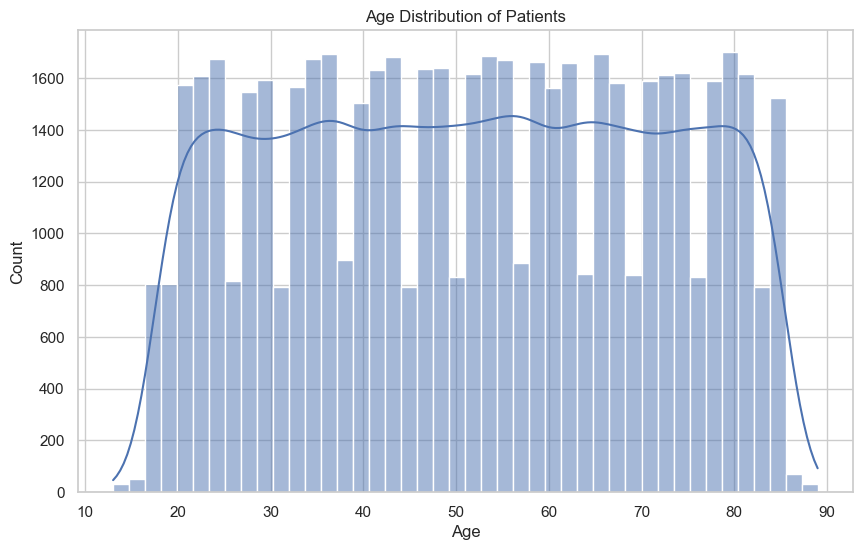

In [81]:
#Age Distribution

sns.histplot(df["Age"], kde=True)
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

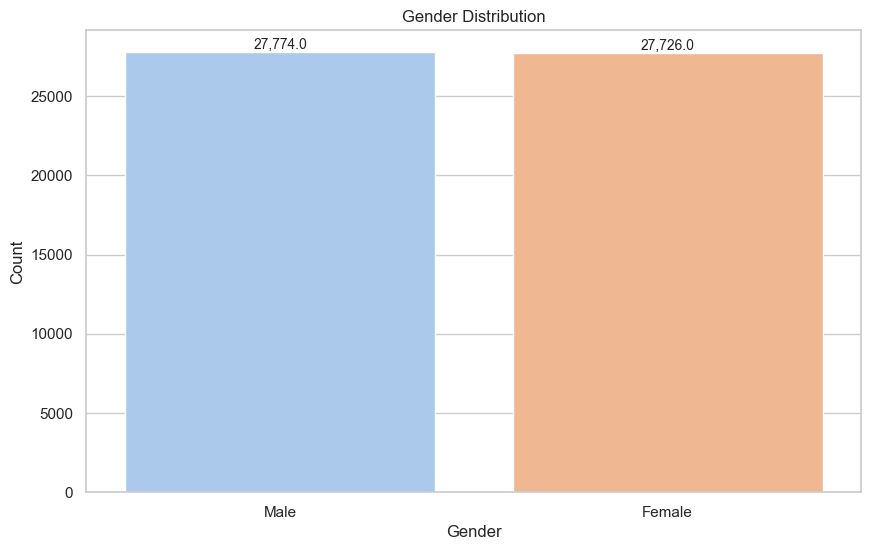

In [82]:
#Gender Distribution

ax = sns.countplot(data=df, x="Gender", hue="Gender", palette="pastel", legend=False)
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")

for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f"{height:,}", 
        (p.get_x() + p.get_width() / 2, height),
        ha="center", va="bottom", fontsize=10
    )

plt.show()

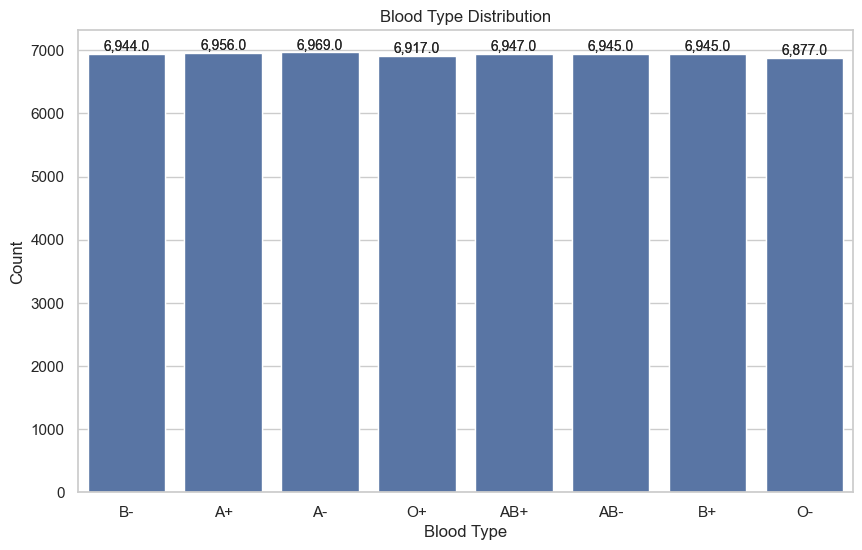

In [83]:
#Blood TYPE distribution

ax = sns.countplot(data=df, x="Blood Type", hue="Blood Type", palette="pastel", legend=False)
sns.countplot(data=df, x="Blood Type", order=df["Blood Type"].value_counts().index)
plt.title("Blood Type Distribution")
plt.xlabel("Blood Type")
plt.ylabel("Count")

for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f"{height:,}", 
        (p.get_x() + p.get_width() / 2, height),
        ha="center", va="bottom", fontsize=10
    )


plt.show()


ADMISSION TRENDS




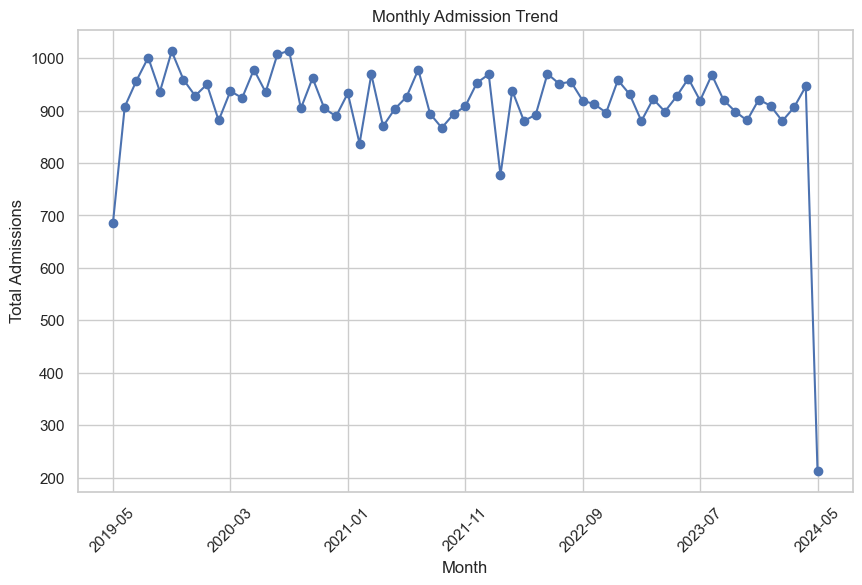

In [84]:
#Monthly Admission Counts

df["Admission_Month"] = df["Date of Admission"].dt.to_period("M").astype(str)

monthly_admissions = df["Admission_Month"].value_counts().sort_index()

monthly_admissions.plot(kind="line", marker="o")
plt.title("Monthly Admission Trend")
plt.xlabel("Month")
plt.ylabel("Total Admissions")
plt.xticks(rotation=45)
plt.show()


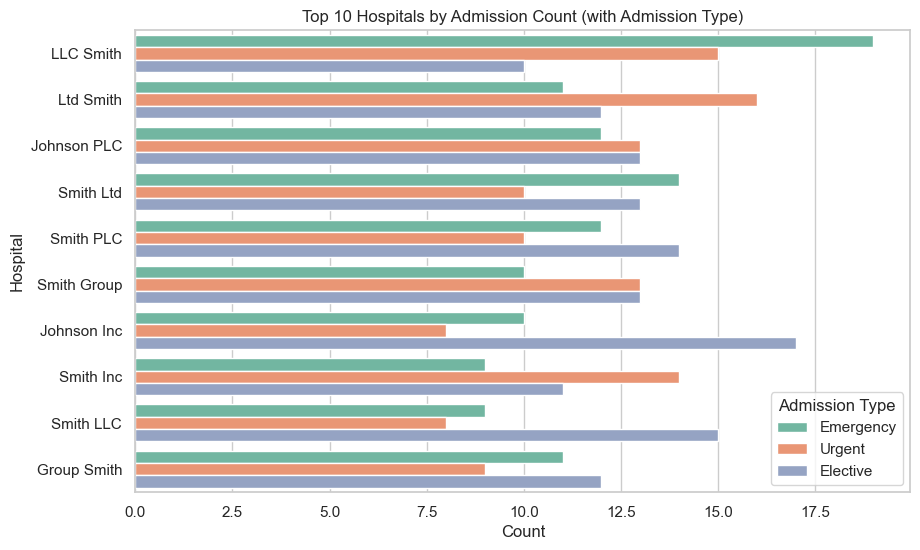

In [85]:
#Top 10 Hospitals by Admission Count

Top10_hospitals = df["Hospital"].value_counts().head(10).index

sns.countplot(
    data=df[df["Hospital"].isin(Top10_hospitals)],
    y="Hospital",
    order=Top10_hospitals,
    hue="Admission Type",      
    palette="Set2"
)

plt.title("Top 10 Hospitals by Admission Count (with Admission Type)")
plt.xlabel("Count")
plt.ylabel("Hospital")
plt.legend(title="Admission Type")
plt.show()




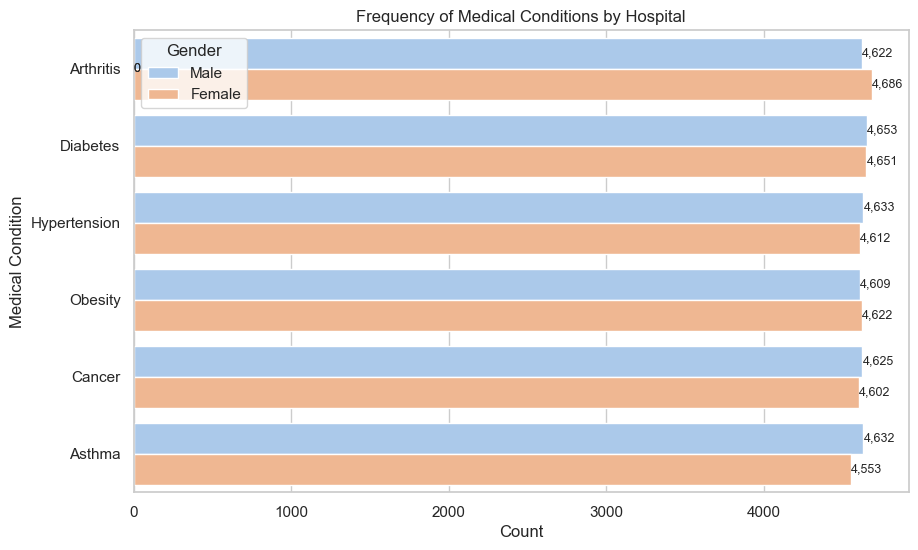

In [86]:
#Medical Condition Distribution by Gender

ax = sns.countplot(
    data=df,
    y="Medical Condition",
    hue="Gender",  
    order=df["Medical Condition"].value_counts().index,
    palette="pastel"
)

plt.title("Frequency of Medical Conditions by Hospital")
plt.xlabel("Count")
plt.ylabel("Medical Condition")

# Add count labels per segment
for p in ax.patches:
    width = p.get_width()
    ax.annotate(
        f"{int(width):,}",
        (width + 1, p.get_y() + p.get_height() / 2),
        ha="left", va="center", fontsize=9
    )

plt.legend(title="Gender")
plt.show()



Billing Analyis


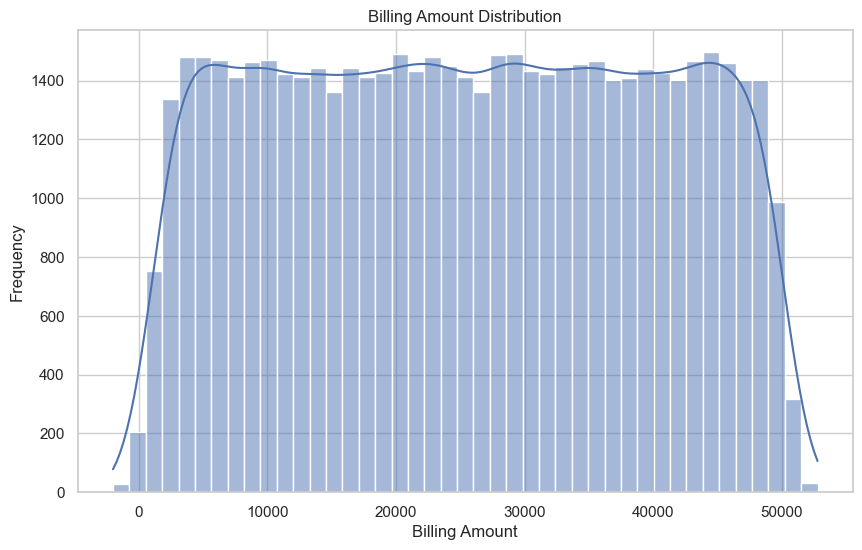

In [87]:
#Billing Amount Distribution

sns.histplot(df["Billing Amount"], kde=True)
plt.title("Billing Amount Distribution")
plt.xlabel("Billing Amount")
plt.ylabel("Frequency")
plt.show()


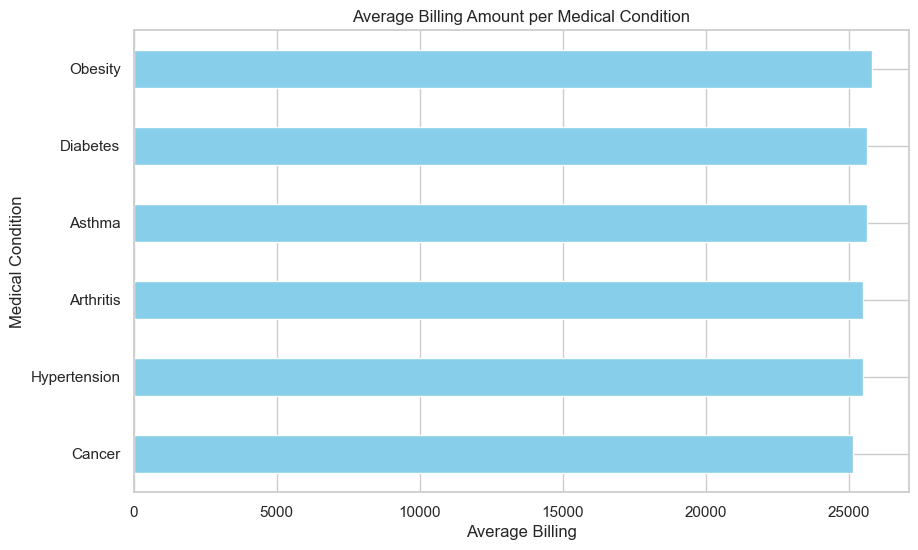

In [88]:
#Average Billing by Medical Condition

Avg_billing = df.groupby("Medical Condition")["Billing Amount"].mean().sort_values()

Avg_billing.plot(kind="barh", color="skyblue")
plt.title("Average Billing Amount per Medical Condition")
plt.xlabel("Average Billing")
plt.ylabel("Medical Condition")
plt.show()


LENGTH OF STAY ANALYSIS 

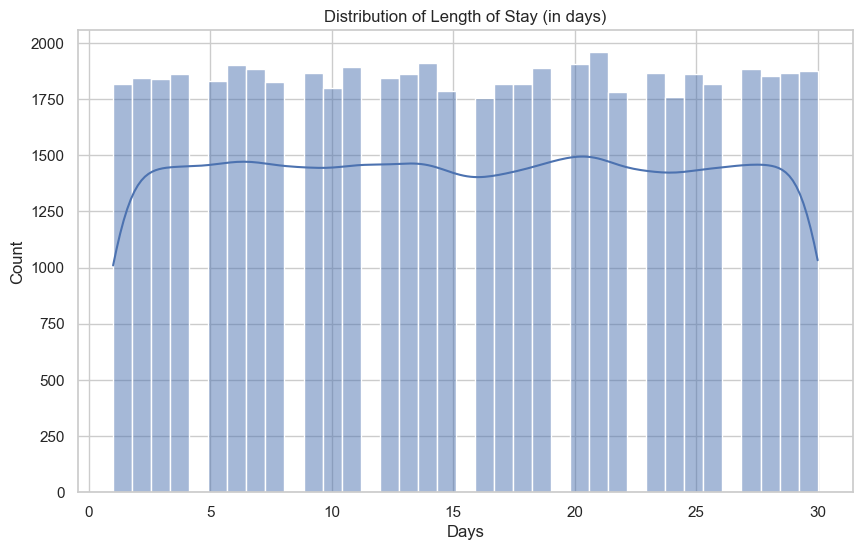

In [90]:
#Distribution of Length of Stay

sns.histplot(df["Len_of_Stay"].dropna(), kde=True)
plt.title("Distribution of Length of Stay (in days)")
plt.xlabel("Days")
plt.ylabel("Count")
plt.show()


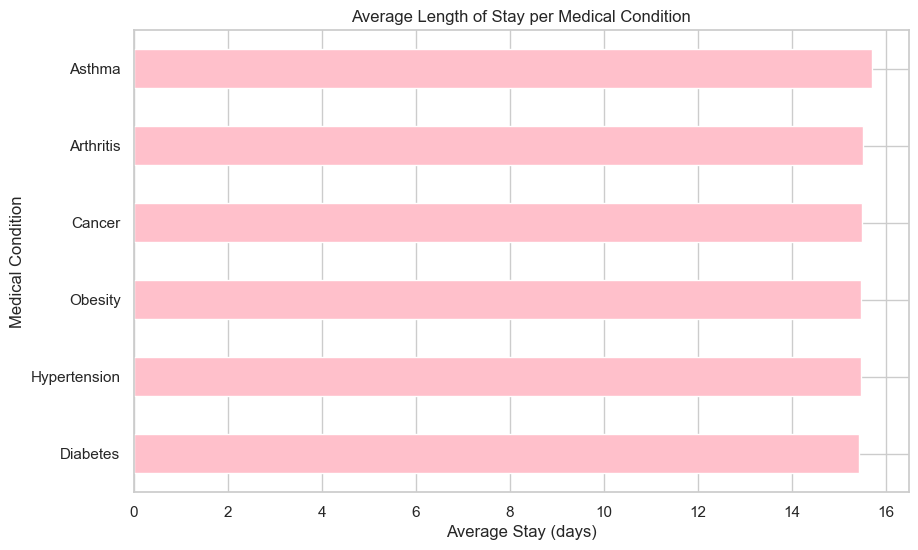

In [95]:
#Average Stay Duration by Medical Condition

avg_stay = df.groupby("Medical Condition")["Len_of_Stay"].mean().sort_values()

avg_stay.plot(kind="barh", color="pink")
plt.title("Average Length of Stay per Medical Condition")
plt.xlabel("Average Stay (days)")
plt.ylabel("Medical Condition")
plt.show()


CORREALTION ANALYSIS VIA HEATMAP

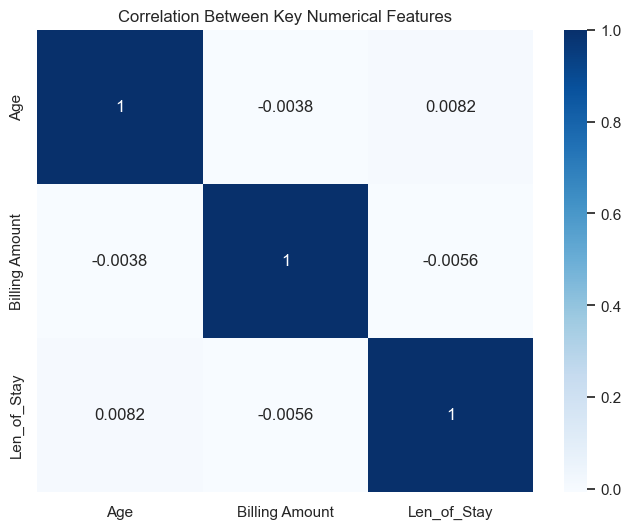

In [97]:
#Correaltion HEATMAP
plt.figure(figsize=(8,6))
sns.heatmap(df[["Age", "Billing Amount", "Len_of_Stay"]].corr(), annot=True, cmap="Blues")
plt.title("Correlation Between Key Numerical Features")
plt.show()
